<a href="https://colab.research.google.com/github/andrecrocha/Analise-e-exploracao-de-dados/blob/master/Andr%C3%A9CRocha_Dados_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS DO IMBD - CORRELAÇÃO E EXPLORAÇÃO
Vamos analisar uma pequena amostra da base de dados de filmes do [IMDB](https://www.imdb.com/). Iremos explorar os dados, fazendo as análises descritivas e investigando as correlações entre as variáveis, passando também pelas dificuldades encontradas em lidar com grande número de dados. 


O primeiro passo é importar a biblioteca do pandas, abrir o DataSet e dar uma primeira visualizada nos dados com o método `.head()`. Também queremos saber a forma do nosso banco, usando o `shape`. 

In [1]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head(10) # Exploração visual dos 10 primeiros filmes

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [2]:
imdb.shape # 5043 linhas e 28 colunas

(5043, 28)

Começando nossa exploração. Vamos ver algumas características da coluna **Color**. Primeiro veremos quais os valores únicos que ela tem usando o método `.unique()`. Vemos que essa coluna tem três valores: 'Color', 'nan' e 'Black and White'. 

In [3]:
imdb["color"].unique()


array(['Color', nan, ' Black and White'], dtype=object)

Podemos também contar a frequência dos valores que apareceram. Perceba que se exclui os dados em branco.

In [4]:
imdb["color"].value_counts()


Color               4815
 Black and White     209
Name: color, dtype: int64

O parâmetro `normalize=True` traz as informações em porcentagem. 

In [5]:
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

Agora já descobrimos quantos filmes coloridos e preto e branco temos, e também que há precisamente 5043 filmes na base. Calculamos qual é a participação de cada um dos tipos de filmes (95% são filmes coloridos).

Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados. 

In [6]:
# Valores absolutos dos filmes que os diretores fizeram. 
imdb["director_name"].value_counts()

Steven Spielberg       26
Woody Allen            22
Martin Scorsese        20
Clint Eastwood         20
Ridley Scott           17
                       ..
Oleg Stepchenko         1
Chuan Lu                1
John Badham             1
Francesca Gregorini     1
Chris Butler            1
Name: director_name, Length: 2398, dtype: int64

É muito importante saber a natureza dos dados. Saber a porcentagem de filmes por diretor não faz muito sentido, como vemos a seguir. Como existem muitos diretores, essa porcentagem será insignificante. 

In [7]:
imdb["director_name"].value_counts(normalize=True)

Steven Spielberg       0.005264
Woody Allen            0.004454
Martin Scorsese        0.004049
Clint Eastwood         0.004049
Ridley Scott           0.003442
                         ...   
Oleg Stepchenko        0.000202
Chuan Lu               0.000202
John Badham            0.000202
Francesca Gregorini    0.000202
Chris Butler           0.000202
Name: director_name, Length: 2398, dtype: float64

Agora, por exemplo, podemos pegar uma variável contínua e fazer uma estatística descritiva, como o número de Reviews, por exemplo. 

In [8]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [9]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

Podemos notar que, se temos 5043 filmes e 4993 valores da review, alguns filmes ficaram sem avaliação.
Então fica uma questão importante para a exploração. Há valores 0 nessa variável? Se sim elas foram contadas.
Se não, os filmes que não tiveram Review já foram excluidos da contagem. Assim vamos constatar isso, pedindo
um valor mínimo.

In [10]:
imdb["num_critic_for_reviews"].min()

1.0

Vemos que o valor mínimo é 1. Portanto, não há valores 0 e isso significa que os filmes sem avaliação ficaram como nulos. 

Já que o número de reviews é uma variável contínua, podemos fazer um histrograma para verificar a distribuição e frequência dessa variável. Importaremos a biblioteca do **seaborn**, e depois plotaremos o gráfico. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


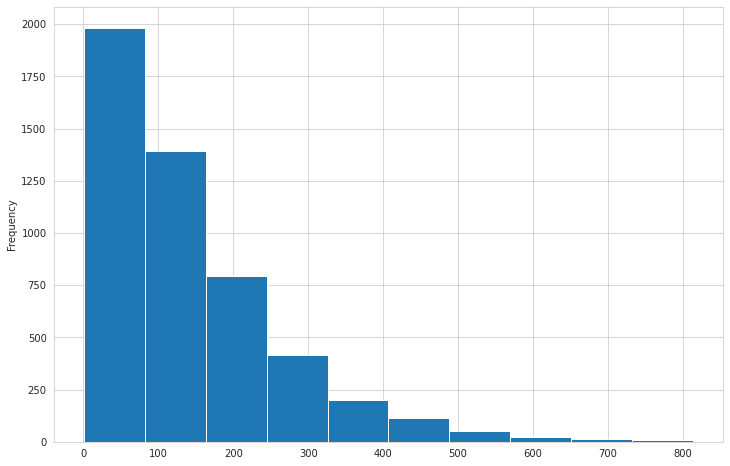

In [11]:
import seaborn as sns
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind="hist", figsize=(12,8))


Vemos que é uma distribuição altamente assimétrica. Muitos filmes tem pouca avaliação, e poucos filmes tem muita avaliação. Uma hipótese que podemos levantar é que os filmes que tem muitas avaliações são muito populares, e portanto muito poucos filmes fazem sucesso.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelas receitas, da coluna "gross". 

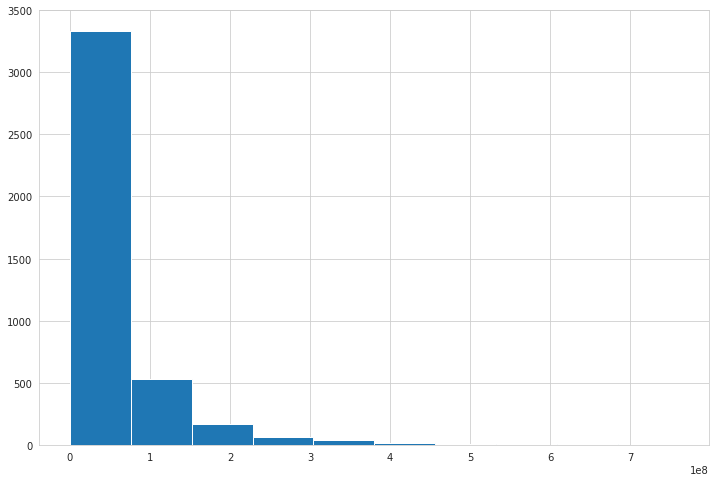

In [12]:
imdb["gross"].hist(figsize=(12,8))


Em primeiro lugar, vemos que as escalas estão totalmente diferentes, pois no **eixo X** temos valores tão altos que a escala teve que ser de centena de milhões. Vemos que pouquíssimos filmes tem alto faturamento, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

Vamos tentar conhecer quais são esses filmes com faturamento astronômico.

In [13]:
# Agora vamos ver os 5 filmes que mais gastaram na produção
imdb.sort_values("gross", ascending=False).head(5)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


Nessa lista temos **Avatar**, **Titanic**, **Jurassic World** e **The Avengers**, o que parece fazer sentido, pois sabemos que esses foram filmes com bilheterias gigantescas. Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido. Por outro lado, encontramos um problema nos dados, dado que o filme **The Avengers** aparece duas vezes, nas linhas 4 e 5. Podemos usar o pandas para remover esses dados usando o método `.drop_duplicates()`, mas por enquanto vamos manter todas as informações. 


## Questionamentos Gerais
Uma parte fundamental de qualquer exploração de dados é fazer questionamentos, levantar hipóteses e depois confirmá-las (ou não). Com respeito aos filmes, podemos fazer perguntas como: 
- aventura tem nota melhor que comédia?
- diretor com mais filmes tem nota melhor e mais faturamento?
- as respostas são específicas para a amostra ou para o universo?
- quais as correlações existem entre os dados?
- qual a relaçãi entre faturamento e orçamento (gross x budget)? 
- o ano de lançamento se relaciona com que?
- filmes coloridos são mais bem avaliados que filmes preto e branco?



Vamos começar então nossa exploração com esse último questionament: filmes coloridos são mais bem avaliados que filmes preto e branco? Uma boa prática é transformar a coluna "color" em uma variável numérica binária (0 para "preto e branco", 1 para "color". Transformar em valores numéricos é mais fácil para trabalhar com a API. 

In [14]:
# Primeiro passo transformaremos a coluna "color" em uma variável númerica binária
# 0 para preto e branco, 1 para colorido.
# Colocaremos primeiro os filmes com informações na coluna "color" em uma variável, tomando
# cuidado com o nome da string, porque no caso a string Black and White tem espaço entre ela.
color_bw = imdb.query("color in ['Color', ' Black and White']")
# Transformar a informação em números inteiros. O True retorna 1 e o False retorna 0. 
color_bw["color_0_ou_1"] = (color_bw["color"] == 'Color') * 1
color_bw["color_0_ou_1"].value_counts()






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [15]:
#Vejamos agora como ficou esse novo DataFrame com um nova coluna
color_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não. Vamos importar a biblioteca **matplotlib.pyplot** e plotar um gráfico de dispersão com o **seaborn**. 

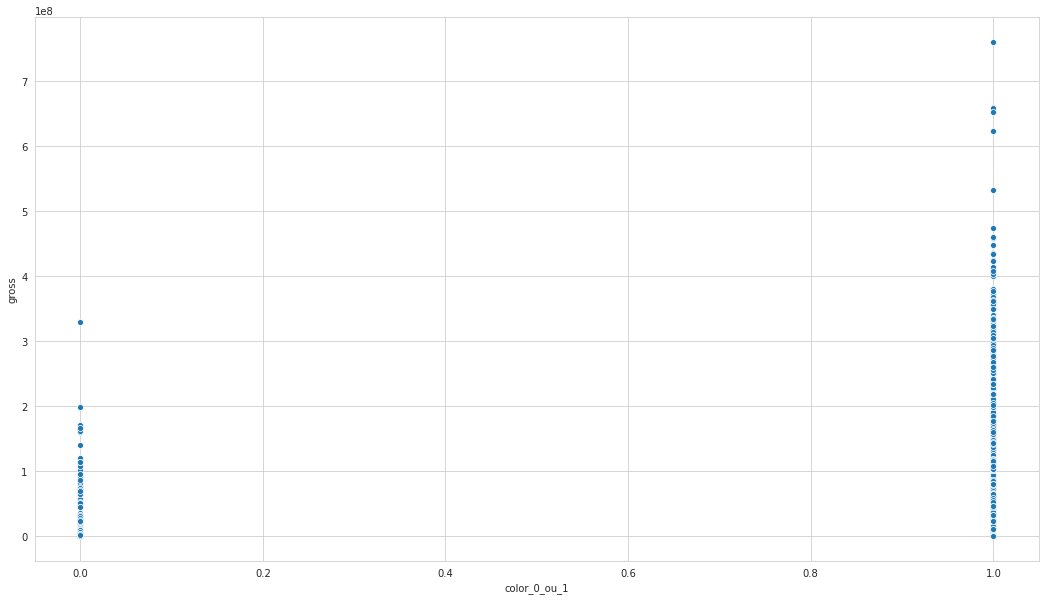

In [16]:
# Agora vamos fazer um gráfico de dispersão, relacionando o a variável COR, sim ou não
# com a variável "gross", ou seja, com os ganhos. 
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
sns.scatterplot(data=color_bw, x="color_0_ou_1", y="gross")
plt.show()



Esse gráfico nos ajuda a comparar as informações. Repare como filmes coloridos tem valores bem maiores, o que já era até esperado, mas também temos pontos bem altos em filmes preto e branco, que chamam a atenção. 

Vamos explorar algumas estatísticas destes filmes...

Por exemplo, qual é o filme preto e branco que teve o maior faturamento (o ponto mais alto no gráfico)?

In [17]:
# Descobrir o que teve maior "gross" do preto e branco
color_bw.query("color_0_ou_1==0").sort_values("gross", ascending=False)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
836,Black and White,Robert Zemeckis,149.0,142.0,0.0,194.0,Siobhan Fallon Hogan,15000.0,329691196.0,Comedy|Drama,Tom Hanks,Forrest Gump,1251222,15700,Sam Anderson,0.0,amputee|love|vietnam|vietnam war|war hero,http://www.imdb.com/title/tt0109830/?ref_=fn_t...,1398.0,English,USA,PG-13,55000000.0,1994.0,294.0,8.8,2.35,59000,0
111,Black and White,Michael Bay,191.0,184.0,0.0,691.0,Jaime King,3000.0,198539855.0,Action|Drama|History|Romance|War,Jennifer Garner,Pearl Harbor,254111,5401,Mako,0.0,air raid|black smoke|japanese military|japanes...,http://www.imdb.com/title/tt0213149/?ref_=fn_t...,1999.0,English,USA,PG-13,140000000.0,2001.0,961.0,6.1,2.35,0,0
1585,Black and White,Rob Marshall,223.0,113.0,252.0,90.0,Chita Rivera,539.0,170684505.0,Comedy|Crime|Musical,Colm Feore,Chicago,172080,813,Jayne Eastwood,0.0,fame|jail|jazz age|murder|vaudeville,http://www.imdb.com/title/tt0299658/?ref_=fn_t...,1017.0,English,USA,PG-13,45000000.0,2002.0,151.0,7.2,1.85,0,0
2944,Black and White,Martin Campbell,400.0,144.0,258.0,834.0,Tobias Menzies,6000.0,167007184.0,Action|Adventure|Thriller,Eva Green,Casino Royale,470501,9125,Ivana Milicevic,1.0,casino|espionage|free running|james bond|terro...,http://www.imdb.com/title/tt0381061/?ref_=fn_t...,2301.0,English,UK,PG-13,150000000.0,2006.0,1000.0,8.0,2.35,0,0
286,Black and White,Martin Campbell,400.0,144.0,258.0,834.0,Tobias Menzies,6000.0,167007184.0,Action|Adventure|Thriller,Eva Green,Casino Royale,470483,9125,Ivana Milicevic,1.0,casino|espionage|free running|james bond|terro...,http://www.imdb.com/title/tt0381061/?ref_=fn_t...,2301.0,English,UK,PG-13,150000000.0,2006.0,1000.0,8.0,2.35,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,Black and White,Joseph Green,95.0,70.0,2.0,6.0,Jason Evers,24.0,NaN,Horror|Sci-Fi,Virginia Leith,The Brain That Wouldn't Die,4752,52,Bruce Kerr,1.0,brain|fiance|laboratory|surgeon|surgery,http://www.imdb.com/title/tt0052646/?ref_=fn_t...,152.0,English,USA,Approved,62000.0,1962.0,16.0,4.1,1.66,1000,0
4991,Black and White,Andrew Leman,60.0,47.0,2.0,5.0,David Mersault,19.0,NaN,Fantasy|Horror|Mystery|Thriller,Dan Novy,The Call of Cthulhu,6261,43,Barry Lynch,0.0,1920s|cthulhu|dream|sailor|silent film,http://www.imdb.com/title/tt0478988/?ref_=fn_t...,99.0,English,USA,NaN,50000.0,2005.0,9.0,7.3,1.33,0,0
5005,Black and White,Andrew Bujalski,52.0,109.0,26.0,3.0,Kate Dollenmayer,26.0,NaN,Comedy,Andrew Bujalski,Mutual Appreciation,1578,38,Justin Rice,0.0,friendship|guitarist|mumblecore|musician|new york,http://www.imdb.com/title/tt0446747/?ref_=fn_t...,23.0,English,USA,R,NaN,2005.0,6.0,6.9,1.66,91,0
5022,Black and White,Jim Chuchu,6.0,60.0,0.0,4.0,Olwenya Maina,147.0,NaN,Drama,Paul Ogola,Stories of Our Lives,70,170,Mugambi Nthiga,0.0,NaN,http://www.imdb.com/title/tt3973612/?ref_=fn_t...,1.0,Swahili,Kenya,NaN,15000.0,2014.0,19.0,7.4,NaN,45,0


Isso foi interessante... Fomos buscar o outlier do preto e branco e descobrimos que na verdade ele não era preto e branco. É o famoso filme **Forrest Gump**. Olhando pros primeiros filmes do DF dá pra ver que são filmes muito recentes também, então provavelmente há muitos erros no DadaSet do IMBD, e esses erros podem enviesar muito a análise. Talvez o filme Forrest Gump esteja duplicado, ou seja, pode haver um Forrest Gump preto e branco e outro colorido. Vamos verificar isso.

In [18]:
color_bw.query("director_name in ['Robert Zemeckis']").sort_values("gross", ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
836,Black and White,Robert Zemeckis,149.0,142.0,0.0,194.0,Siobhan Fallon Hogan,15000.0,329691196.0,Comedy|Drama,Tom Hanks,Forrest Gump,1251222,15700,Sam Anderson,0.0,amputee|love|vietnam|vietnam war|war hero,http://www.imdb.com/title/tt0109830/?ref_=fn_t...,1398.0,English,USA,PG-13,55000000.0,1994.0,294.0,8.8,2.35,59000,0
396,Color,Robert Zemeckis,221.0,143.0,0.0,272.0,Paul Sanchez,15000.0,233630478.0,Adventure|Drama|Romance,Tom Hanks,Cast Away,394317,15838,Nick Searcy,1.0,christmas|island|love|survival|talking to inan...,http://www.imdb.com/title/tt0162222/?ref_=fn_t...,1051.0,English,USA,PG-13,90000000.0,2000.0,410.0,7.7,1.85,23000,1
2363,Color,Robert Zemeckis,198.0,116.0,0.0,459.0,Thomas F. Wilson,1000.0,210609762.0,Adventure|Comedy|Sci-Fi,Lea Thompson,Back to the Future,732212,3230,J.J. Cohen,0.0,clock tower|delorean|future|time travel|time t...,http://www.imdb.com/title/tt0088763/?ref_=fn_t...,809.0,English,USA,PG,19000000.0,1985.0,690.0,8.5,1.18,39000,1
356,Color,Robert Zemeckis,185.0,130.0,0.0,568.0,Amber Valletta,11000.0,155370362.0,Drama|Fantasy|Horror|Mystery|Thriller,Harrison Ford,What Lies Beneath,98403,12890,Miranda Otto,0.0,ghost|haunted house|research|secret|vermont,http://www.imdb.com/title/tt0161081/?ref_=fn_t...,683.0,English,USA,PG-13,100000000.0,2000.0,627.0,6.6,2.35,0,1
61,Color,Robert Zemeckis,240.0,96.0,0.0,10000.0,Colin Firth,18000.0,137850096.0,Animation|Drama|Family|Fantasy,Robin Wright,A Christmas Carol,72809,48878,Gary Oldman,0.0,charles dickens|christmas|christmas eve|ghost|...,http://www.imdb.com/title/tt1067106/?ref_=fn_t...,249.0,English,USA,PG,200000000.0,2009.0,14000.0,6.8,2.35,0,1
1188,Color,Robert Zemeckis,125.0,108.0,0.0,690.0,Jeffrey Weissman,1000.0,118500000.0,Adventure|Comedy|Sci-Fi,Lea Thompson,Back to the Future Part II,340085,3660,Thomas F. Wilson,0.0,alternate timeline|same actor playing two char...,http://www.imdb.com/title/tt0096874/?ref_=fn_t...,327.0,English,USA,PG,40000000.0,1989.0,869.0,7.8,1.85,12000,1
375,Color,Robert Zemeckis,159.0,150.0,0.0,135.0,Tom Skerritt,11000.0,100853835.0,Drama|Mystery|Sci-Fi|Thriller,Matthew McConaughey,Contact,200556,12289,Larry King,2.0,message from outer space|religion|religion ver...,http://www.imdb.com/title/tt0118884/?ref_=fn_t...,611.0,English,USA,PG,90000000.0,1997.0,1000.0,7.4,2.35,15000,1
1576,Color,Robert Zemeckis,449.0,138.0,0.0,874.0,Bruce Greenwood,18000.0,93749203.0,Drama|Thriller,Denzel Washington,Flight,264047,20952,Nadine Velazquez,0.0,airline|flight|flight attendant|lawyer|pilot,http://www.imdb.com/title/tt1907668/?ref_=fn_t...,491.0,English,USA,R,31000000.0,2012.0,984.0,7.3,2.35,64000,1
1201,Color,Robert Zemeckis,111.0,118.0,0.0,690.0,Jeffrey Weissman,1000.0,87666629.0,Adventure|Comedy|Sci-Fi|Western,Lea Thompson,Back to the Future Part III,283480,3986,Thomas F. Wilson,0.0,band|dog|letter|time machine|tombstone,http://www.imdb.com/title/tt0099088/?ref_=fn_t...,263.0,English,USA,PG,40000000.0,1990.0,869.0,7.4,1.37,0,1
153,Color,Robert Zemeckis,287.0,115.0,0.0,964.0,Anthony Hopkins,18000.0,82161969.0,Action|Adventure|Animation|Fantasy,Robin Wright,Beowulf,142440,31523,Sebastian Roché,1.0,creature|demon|king|reward|warrior,http://www.imdb.com/title/tt0442933/?ref_=fn_t...,505.0,English,USA,PG-13,150000000.0,2007.0,12000.0,6.3,2.35,3000,1


Vemos que de fato só há um filme Forrest Gump, e ele é preto e branco, ou seja há um erro no DF. Podemos corrigir esse erro transformando o valor da coluna para 1 no filme Forrest Gump, usando o método `.at`. Aqui corrigimos só para o Forrest Gump, mas suspeitamos que vários filmes que são coloridos estejam preto e branco. Nesse caso, teríamos que ver filme por filme, mas não faremos isso aqui. Isso serve pra mostrar que erros como esses são comuns no processo de exploração de dados.

In [19]:
color_bw.at[836, "color_0_ou_1"] = 1
color_bw.at[836, "color_0_ou_1"]
color_bw.loc[836]


color                                                          Black and White
director_name                                                  Robert Zemeckis
num_critic_for_reviews                                                     149
duration                                                                   142
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     194
actor_2_name                                              Siobhan Fallon Hogan
actor_1_facebook_likes                                                   15000
gross                                                              3.29691e+08
genres                                                            Comedy|Drama
actor_1_name                                                         Tom Hanks
movie_title                                                      Forrest Gump 
num_voted_users                                     

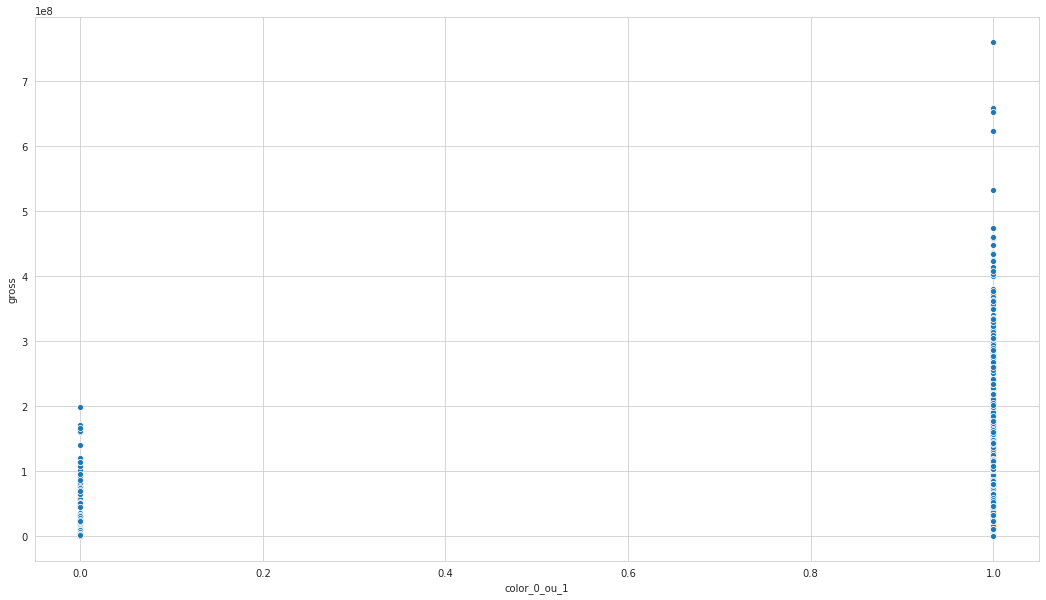

In [20]:
#Vemos que agora o filme Forrest Gump está colorido na coluna "color_0_ou_1"
plt.figure(figsize=(18,10))
sns.scatterplot(data=color_bw, x="color_0_ou_1", y="gross")
plt.show()

In [21]:
color_bw.query("color_0_ou_1==1").sort_values("title_year") # fazendo o inverso, dá pra ver
# que Branca de Neve é realmente colorido...

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0,1
3970,Color,Victor Fleming,157.0,226.0,149.0,248.0,George Reeves,503.0,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,1862,Thomas Mitchell,1.0,battle of the sexes|gallantry|honesty|indiffer...,http://www.imdb.com/title/tt0031381/?ref_=fn_t...,706.0,English,USA,G,3977000.0,1939.0,384.0,8.2,1.37,16000,1
1143,Color,Norman Ferguson,105.0,88.0,3.0,40.0,Dickie Jones,1000.0,84300000.0,Animation|Family|Fantasy|Musical,Mel Blanc,Pinocchio,90360,1178,Cliff Edwards,0.0,boy|conscience|fairy|jiminy cricket|pinocchio,http://www.imdb.com/title/tt0032910/?ref_=fn_t...,147.0,English,USA,Approved,2600000.0,1940.0,48.0,7.5,1.37,0,1
4225,Color,James Algar,99.0,120.0,11.0,NaN,Deems Taylor,16.0,76400000.0,Animation|Family|Fantasy|Music,Leopold Stokowski,Fantasia,71321,16,NaN,0.0,apprentice|classical music|disney|mouse|orchestra,http://www.imdb.com/title/tt0032455/?ref_=fn_t...,230.0,English,USA,G,2280000.0,1940.0,0.0,7.8,1.37,3000,1
4647,Color,James Algar,116.0,70.0,11.0,8.0,Donnie Dunagan,16.0,102797150.0,Animation|Drama|Family,Sam Edwards,Bambi,94225,63,Ann Gillis,0.0,animal|bambi|deer|forest|hunter,http://www.imdb.com/title/tt0034492/?ref_=fn_t...,136.0,English,USA,Approved,NaN,1942.0,12.0,7.4,1.33,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,Color,NaN,75.0,60.0,NaN,833.0,Masi Oka,1000.0,NaN,Drama|Fantasy|Sci-Fi|Thriller,Sendhil Ramamurthy,Heroes,202115,4908,Greg Grunberg,4.0,father daughter relationship|serial killer|sup...,http://www.imdb.com/title/tt0813715/?ref_=fn_t...,379.0,English,USA,TV-14,NaN,NaN,923.0,7.7,16.00,0,1
4803,Color,NaN,11.0,22.0,NaN,6.0,Ron Lynch,59.0,NaN,Animation|Comedy|Drama,Brendon Small,Home Movies,7458,81,Melissa Bardin Galsky,0.0,coach|friend|school|series|tv series,http://www.imdb.com/title/tt0197159/?ref_=fn_t...,82.0,English,USA,TV-PG,NaN,NaN,11.0,8.2,1.33,526,1
4819,Color,NaN,23.0,43.0,NaN,576.0,Tracy Spiridakos,2000.0,NaN,Action|Adventure|Drama|Sci-Fi,Billy Burke,Revolution,72017,5052,David Lyons,6.0,2020s|near future|one word series title|post a...,http://www.imdb.com/title/tt2070791/?ref_=fn_t...,323.0,English,USA,TV-14,NaN,NaN,821.0,6.7,16.00,17000,1
4869,Color,NaN,11.0,58.0,NaN,250.0,James Norton,887.0,NaN,Crime|Drama,Shirley Henderson,Happy Valley,12848,2572,Sarah Lancashire,1.0,caravan|police|police sergeant|tied to a chair...,http://www.imdb.com/title/tt3428912/?ref_=fn_t...,59.0,English,UK,TV-MA,NaN,NaN,340.0,8.5,16.00,10000,1


Vamos ver a médida do faturamento dos filmes pela cor. 

In [22]:
# Vamos ver a média do "gross" dos filmes, colorido ou preto e branco.
color_bw.groupby("color").mean()["gross"]


color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

Vemos que a média de ganhos dos filmes coloridos é bem maior. Mas porque isso? Quais são as hipóteses? Ora, pode ser que antigamente a indústria do cinema movimentava muito menos dinheiro, então os filmes mais antigos ganhavam menos. Pode ser que esses valores não estão corrigidos pela inflação, entre outras. Será que as notas dos filmes coloridos também são maiores? 

In [23]:
# Vamos ver a média das notas
color_bw.groupby("color").mean()["imdb_score"]
# Vemos que o preto e branco tem a nota média mais alta


color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [24]:
# Vamos ver a mediana das notas
color_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

Das estatísticas vemos coisas interessantes. A média e a mediana das notas dos filmes preto e branco são maiores que as dos filmes coloridos. Por que será? Pode ser que quem dá nota para os filmes preto e branco gosta muito de cinema, e então tende a avaliar esses filmes melhor, por uma nostalgia do passado. É uma possibilidade... 

A partir de agora vamos fazer uma melhor investigação das finanças dos filmes (faturamento e orçamento). Vamos plotar um gráfico relacionando essas duas informações. 

Primeiro, vamos criar um DF só com as colunas que nos interessam, retirando os valores nulos usando o método `.dropna()` e os filmes que tem as duas colunas igual a 0. 

In [25]:
budgetg = imdb[["gross", "budget"]].dropna().query("budget> 0 | gross>0 ")  # Com as colunas com Na dropadas.. 
budgetg.head()

,gross,budget
0,760505847.0,237000000.0
1,309404152.0,300000000.0
2,200074175.0,245000000.0
3,448130642.0,250000000.0
5,73058679.0,263700000.0


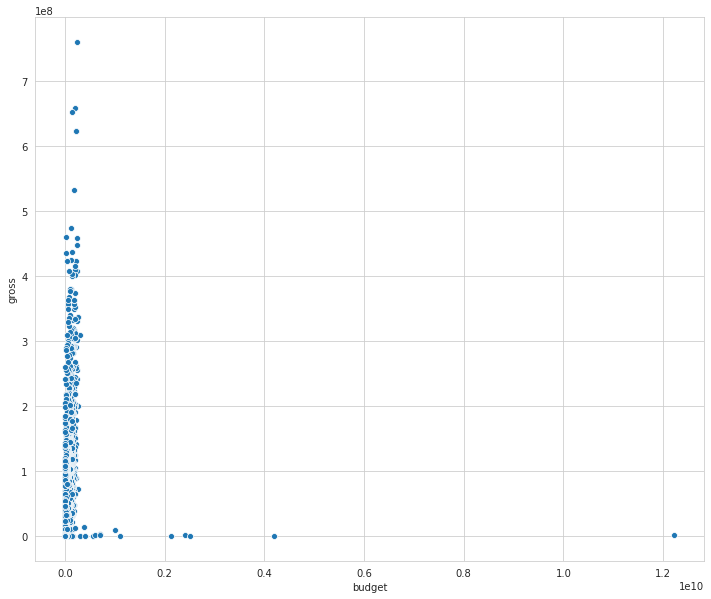

In [26]:
# Plotando o gráfico
plt.figure(figsize=(12,10))
sns.scatterplot(data=budgetg, x="budget", y="gross")
plt.show()

Vemos que existe um *outlier*, um filme com um orçamento muito grande e com um faturamento beirando 0. Isso é muito estranho. Vamos investigar qual é esse filme... 

In [27]:
imdb.sort_values("budget", ascending=False)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,Color,Tadeo Garcia,NaN,84.0,5.0,12.0,Michael Cortez,21.0,NaN,Drama,Tatiana Suarez-Pico,On the Downlow,156,62,Eric Ambriz,2.0,gang initiation|gunplay|hazing|latino|shakespe...,http://www.imdb.com/title/tt0390323/?ref_=fn_t...,3.0,English,USA,NaN,NaN,2004.0,20.0,6.1,NaN,22
5032,Color,Ash Baron-Cohen,10.0,98.0,3.0,152.0,Stanley B. Herman,789.0,NaN,Crime|Drama,Peter Greene,Bang,438,1186,James Noble,1.0,corruption|homeless|homeless man|motorcycle|ur...,http://www.imdb.com/title/tt0109266/?ref_=fn_t...,14.0,English,USA,NaN,NaN,1995.0,194.0,6.4,NaN,20
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000


Agora vamos buscar quem foi o outlier do exercicio anterior. Ordenando os dados vemos que os filmes com maior orçamento são asiáticos. Ora, pode ser que a moeda não esteja convertida, gerando assim valores incompatíveis. Para evitar esse tipo de problema no DataSet, vamos trabalhar só com os filmes americanos, criando um DF exclusivo para eles.

In [28]:
# Assim trabalharemos só com os filmes americanos. 
filmes_americanos = imdb.query("country=='USA'").drop_duplicates()
filmes_americanos


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


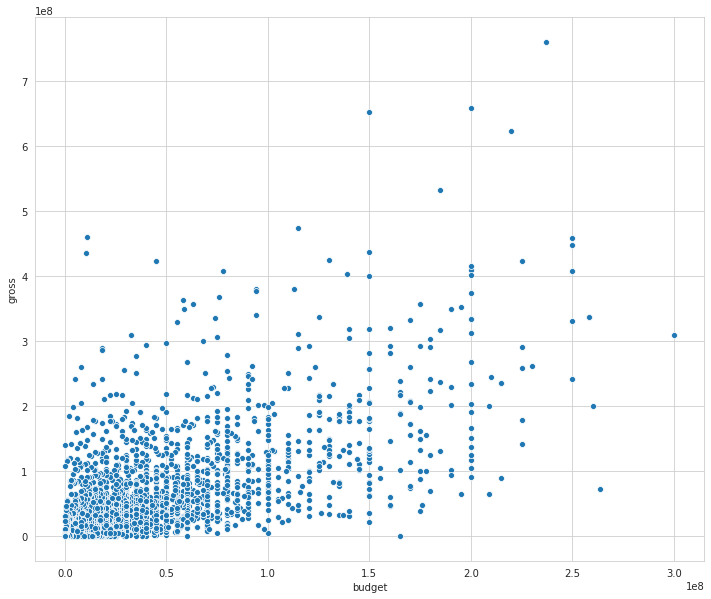

In [29]:
# Agora, criaremos um DF só com as colunas necessárias e depois plotaremos o gráfico
# de dispersão.
filmes_americanos_1 = filmes_americanos[["gross", "budget"]].dropna().query("budget> 0 | gross>0 ")
plt.figure(figsize=(12,10))
sns.scatterplot(data=filmes_americanos_1, x="budget", y="gross")
plt.show()


Veja que interessante, essa gráfico é melhor porque ele parece esboçar uma reta. Aparentemente temos uma relação entre orçamento e faturamento, ou seja, quanto maior for o orçamento, maior será faturamento.

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no DataSet é conhecido como [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). 

In [30]:
# Podemos também construir uma nova variável, chamada lucro, "os ganhos" - "os prejuízos"
filmes_americanos["lucro"] = filmes_americanos["gross"] - filmes_americanos["budget"]
# Vemos que a coluna "lucro foi criada"
filmes_americanos.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


Agora, vamos criar um DF só com a colunas que nos interessam, relacionam os gastos (budget) com os lucros. Depois plotamos o gráfico de dispersão. 

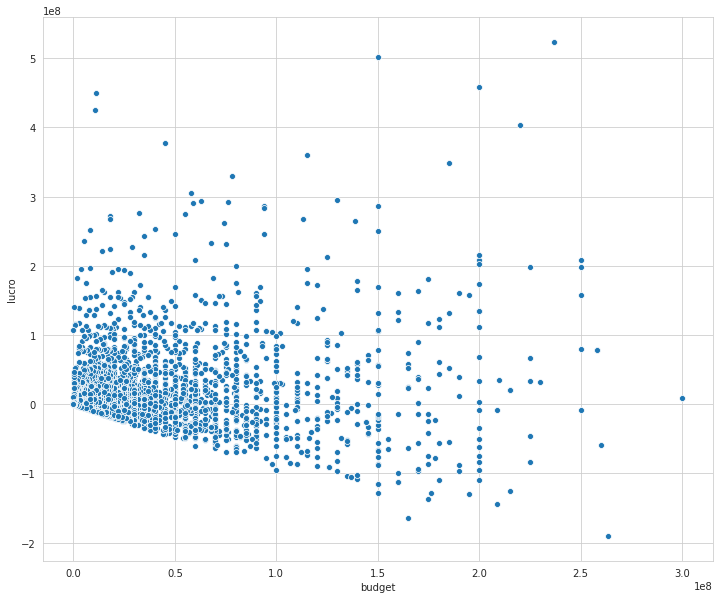

In [31]:
budget_gross = filmes_americanos.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()
plt.figure(figsize=(12,10))
sns.scatterplot(data=budget_gross, x="budget", y="lucro")
plt.show()

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuízo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento, ou seja, lançamentos recentes. Outro ponto interessante de se analisar seria os filmes com baixos orçamentos e muito lucro, será que estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade?

Vamos continuar analisando essa variável "lucro", mas agora em relação ao ano de produção. 

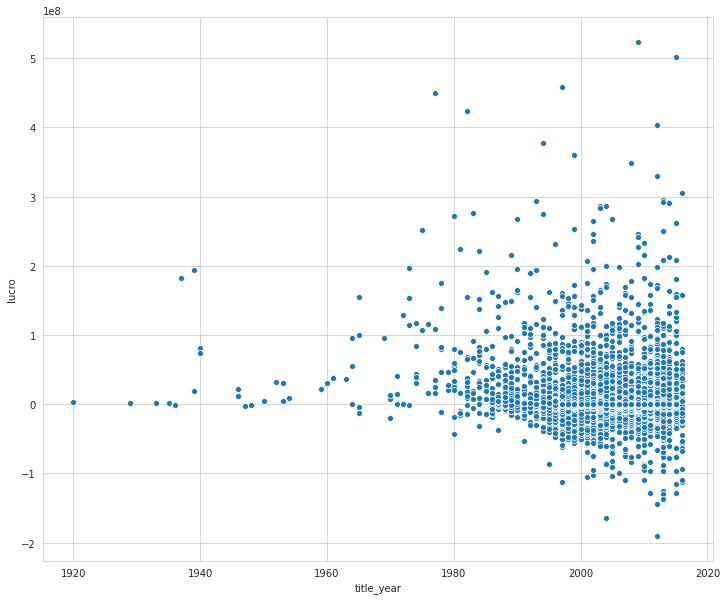

In [32]:
# Agora vamos relacionar o lucro com o Ano de lançamento. 
ano_lucro = filmes_americanos.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()
plt.figure(figsize=(12,10))
sns.scatterplot(data=ano_lucro, x="title_year", y="lucro")
plt.show()


Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, vamos descobrir...

In [33]:
# Descobrindo os dois filmes pré-guerra com altos lucros
filmes_americanos.query("title_year < 1945").sort_values("lucro", ascending=False).head(2).dropna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
3970,Color,Victor Fleming,157.0,226.0,149.0,248.0,George Reeves,503.0,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,1862,Thomas Mitchell,1.0,battle of the sexes|gallantry|honesty|indiffer...,http://www.imdb.com/title/tt0031381/?ref_=fn_t...,706.0,English,USA,G,3977000.0,1939.0,384.0,8.2,1.37,16000,194678278.0
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0,182925485.0


Vemos que os dois filmes são **Branca de Neve** e **O vento levou**, filmes muito populares, o que sugere que não há mesmo nenhum erro na base, pois é provável que esses filmes tenham auferido muitos lucros. 

Para finalizar, vamos realizar uma análise das correlações dos dados...Existem várias formas de calcular a correlação. Iniciaremos a análise das correlações plotando o `.pairplot()`. 

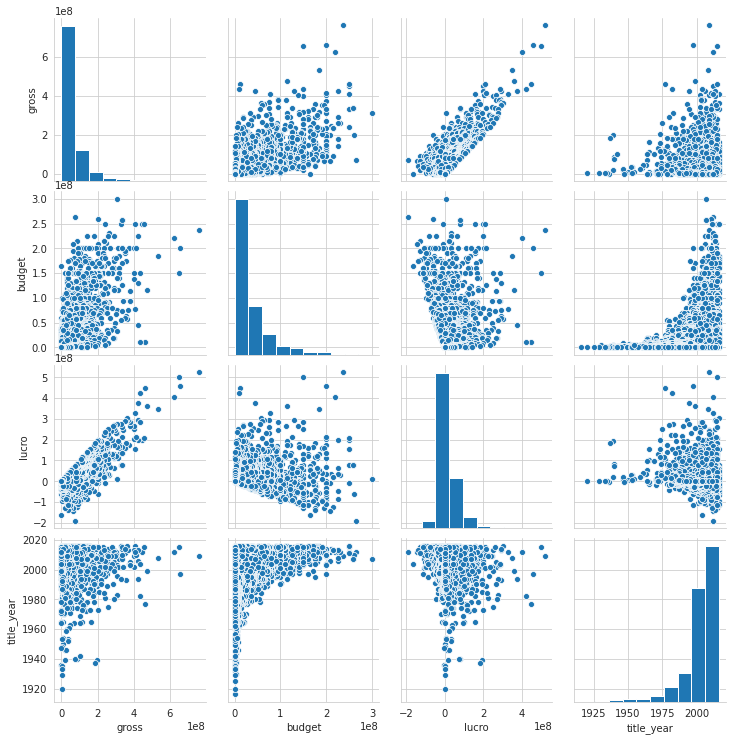

In [34]:
# Agora vamos usar uma correlação múltipla de dados, usando o pairplot
sns.pairplot(data=filmes_americanos[["gross","budget","lucro","title_year"]])


Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do `.corr()` do pandas.

In [35]:
filmes_americanos[["gross","budget","lucro","title_year"]].corr()
# Ter correlção não significa que uma variável é causa de outra, lembre-se.


,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


Agora temos um número único que resume a correlação entre as variáveis. Como interpretá-la? 

A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja, por exemplo, se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa). Neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem nenhuma influência sobre a outra.

Dito isso, vamos analisar as nossas correlações. Vemos que "lucro" e "gross" tem uma correlação alta, de **0,79**, o que indica que quanto maior for o orçamento maior o lucro (repare que a correlação não é perfeita), o que parece fazer sentido. Já o "title_year" e "lucro" tem correlação negativa, mas muito próximo de zero (ou seja, quase não tem correlação). 

##Desafios

**DESAFIO 01**. **Plotar e analisar o Boxplot da média dos filmes em preto e branco e coloridos.** \
Vamos pegar o DataFrame "color_bw" e usar o boxplot do seaborn. 

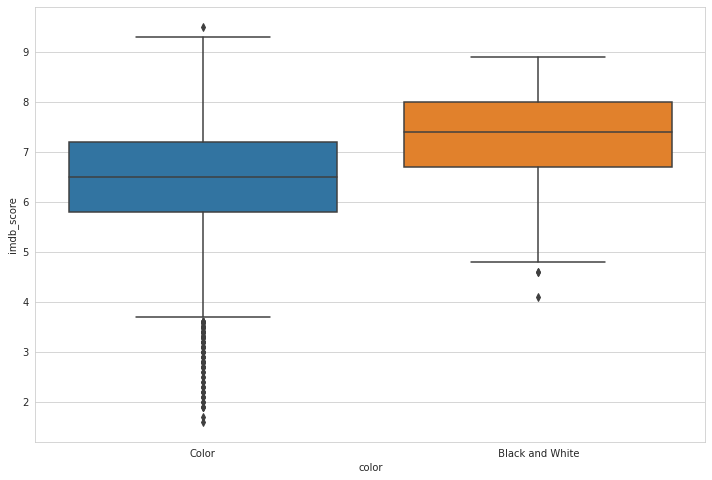

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(data=color_bw, x="color", y="imdb_score")
plt.show()


O que percebemos de cara é que o filme colorido tem uma mediana menor,
e tem também uma média de avaliações menor, seguramente. Percebe-se também que nos filmes coloridos há muitos dados discrepantes. Isso pode ser resultado do tamanho maior de filmes coloridos em relação aos filmes preto e branco. Os valores dos coloridos são bem dispersos também. 

**DESAFIO 02**. **Descobrir o filme com maior prejuízo.** \
No gráfico de budget por lucro temos um ponto com muito custo e prejuizo. Vamos descobrir qual é esse filme (budget próximo de 2.5).

In [37]:
 filmes_americanos.sort_values("lucro").head(1)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


O filme é John Carter, de 2012. Já que o filme é antigo, já deu tempo da pessoa ter lucrado com ele. Assim, concluímos que o filme pode não ter agradado o público mesmo. 

**DESAFIO 03**. **Será que os filmes não tiveram tempo de recuperar o investimento?** \
Há uma hipótese de que os filmes mais recentes podem ter tido prejuizo pois ainda não tiveram tempo de recuperar o investimento. Vamos analisar essa informações e tentar tirar algumas conclusões.

Primeiro passo: vamos ver o ano do último filme lançado.

In [38]:
# Vamos ver o último ano dos filmes lançados. O ano máximo...
filmes_americanos["title_year"].describe()

count    3700.000000
mean     2002.081892
std        12.839414
min      1916.000000
25%      1998.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

Vemos então que o último filme lançado foi em 2016... então 
por exemplo, vamos pegar só os filmes de 2014 a 2016 e testar nossa hipótese. 


In [39]:
# Fazendo um DataFrame com os filmes de 2015 e 2016
filmes_recentes = filmes_americanos.query("title_year > 2014").query("gross > 0").query("budget > 0")
filmes_recentes

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,208991599.0
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,80249062.0
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,Captain America: Civil War,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000,157197282.0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000,502177271.0
45,Color,James Wan,424.0,140.0,0.0,14000.0,Paul Walker,26000.0,350034110.0,Action|Crime|Thriller,Jason Statham,Furious 7,278232,79150,Vin Diesel,0.0,car falling off a cliff|hospital|revenge|star ...,http://www.imdb.com/title/tt2820852/?ref_=fn_t...,657.0,English,USA,PG-13,190000000.0,2015.0,23000.0,7.2,2.35,94000,160034110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,Color,Rob Letterman,218.0,103.0,11.0,543.0,Dylan Minnette,2000.0,80021740.0,Adventure|Comedy|Family|Fantasy|Horror,Odeya Rush,Goosebumps,47988,5497,Ken Marino,4.0,based on book|blob|ferris wheel|manuscript|mon...,http://www.imdb.com/title/tt1051904/?ref_=fn_t...,154.0,English,USA,PG,58000000.0,2015.0,1000.0,6.4,2.35,35000,22021740.0
4602,Color,Benjamin Dickinson,36.0,97.0,4.0,150.0,Alexia Rasmussen,446.0,62480.0,Drama|Sci-Fi,Nora Zehetner,Creative Control,1048,928,Meredith Hagner,1.0,art exhibition|augmented reality|cocaine|nervo...,http://www.imdb.com/title/tt3277624/?ref_=fn_t...,7.0,English,USA,R,1000000.0,2015.0,171.0,5.5,2.39,793,-937520.0
4752,Color,Tim Johnson,165.0,94.0,12.0,183.0,Matt Jones,17000.0,177343675.0,Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi,Jim Parsons,Home,70136,17883,April Winchell,0.0,alien friendship|alien invasion|australia|flyi...,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,214.0,English,USA,PG,135000000.0,2015.0,523.0,6.7,1.85,26000,42343675.0
4938,Color,Dena Seidel,5.0,72.0,0.0,0.0,Hugh Ducklow,0.0,4914.0,Adventure|Documentary,Naderev Sano,Antarctic Edge: 70° South,123,0,Mike Brett,0.0,NaN,http://www.imdb.com/title/tt2780714/?ref_=fn_t...,2.0,English,USA,NaN,150000.0,2015.0,0.0,7.0,NaN,215,-145086.0


In [40]:
# Vamos agora retirar os filmes que tem um registro faltante, fazendo um outro 
# DataFrame só com as colunas que nos interessam
lucro_ano = filmes_recentes[["movie_title","title_year","lucro"]].dropna()
lucro_ano.sample(15)


,movie_title,title_year,lucro
1644,Sicario,2015.0,16875468.0
318,Point Break,2015.0,-76227778.0
812,Deadpool,2016.0,305024263.0
1029,Zoolander 2,2016.0,-21162885.0
106,Alice Through the Looking Glass,2016.0,-93153376.0
163,Gods of Egypt,2016.0,-108858926.0
706,The Hateful Eight,2015.0,10116191.0
1013,Run All Night,2015.0,-23557749.0
4018,Time to Choose,2015.0,-3470767.0
3339,The DUFF,2015.0,25517854.0


In [41]:
# Descrevendo os dados da coluna lucro
lucro_ano["lucro"].describe()

count    1.580000e+02
mean     1.764266e+07
std      7.416747e+07
min     -1.286247e+08
25%     -1.548458e+07
50%      9.424009e+06
75%      3.839283e+07
max      5.021773e+08
Name: lucro, dtype: float64

Vemos que o desvio padrão é muito alto, então a dispersão dos dados é muito grande, o que pode corroborar nossa hipótese, isto é, que muitos lucraram mais também muitos perderam dinheiro. Para melhor visualizarmos isso, vamos fazer um gráfico com os anos de lançamento e os lucros. Abaixo o parâmetro **marker** muda o formato dos marcadores, já o parâmetro **s** muda seu tamanho. Essas mudanças de estilo podem ser encontradas na biblioteca do [matplotlib](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers). 

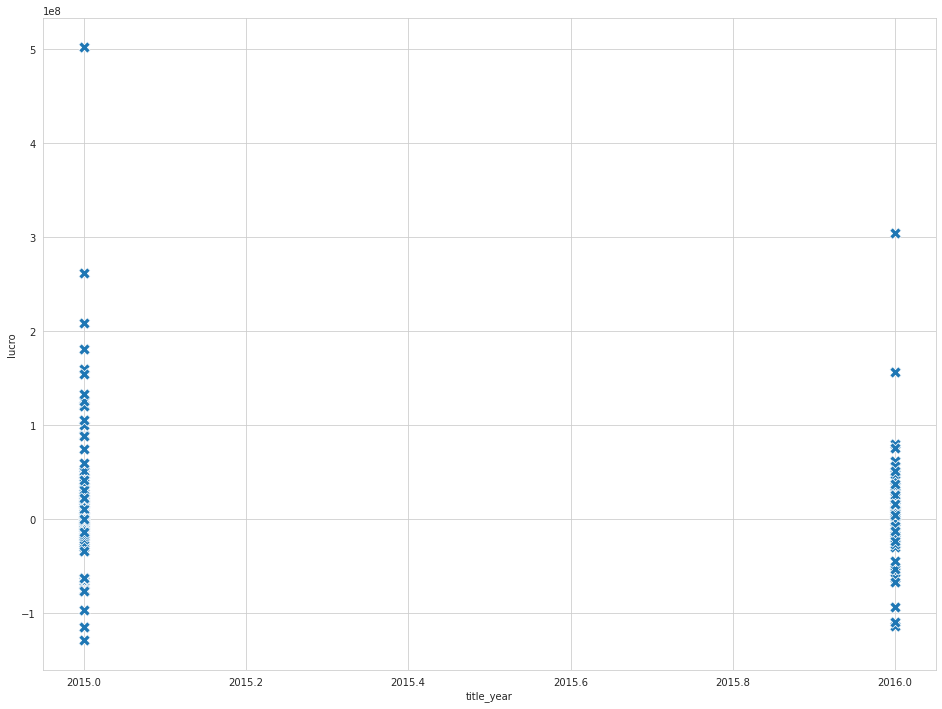

In [42]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=lucro_ano, x="title_year", y="lucro", marker="X", s=130) # O parâmetro marker muda o formato dos marcadores, # o s muda o


Vemos que nossa hipótese para não fazer muito sentido, já que muitos filmes nesses anos tiveram lucros. Seria interessante pegar os meses de lançamento, que provavelmente podem fazer diferença, mas infelizmente não temos essa informação no DataSet. É importante também olhar quando esse DataSet foi extraído.
 


**DESAFIO 04**. **Calcular a correlação apenas dos filmes pós anos 2000** \
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e tentar interpretar essa correlação.


In [43]:
# Filmes pós-2000
filmes_pos_2000 = filmes_americanos.query("title_year > 1999").query("gross > 0").query("budget > 0")
filmes_pos_2000.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


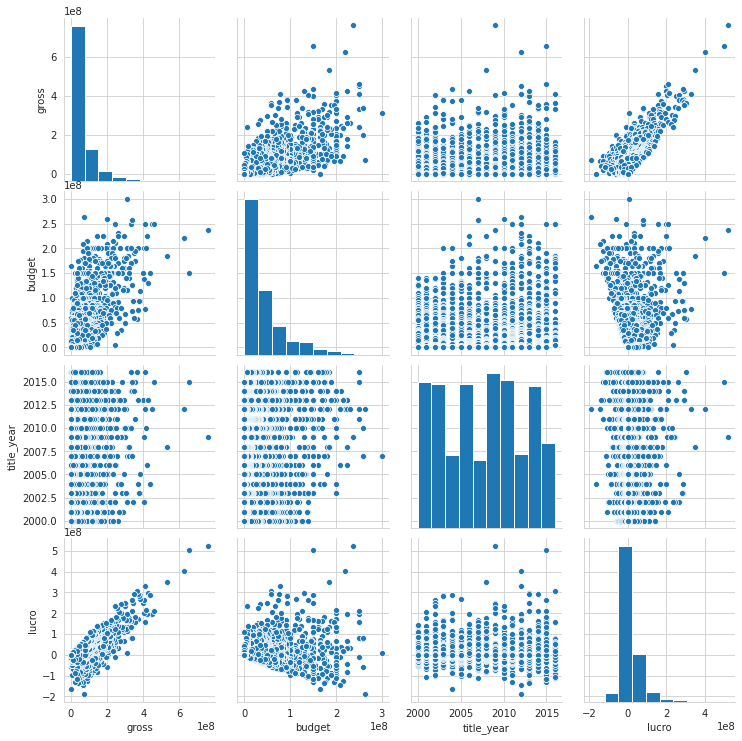

In [44]:
# Plotando os gráficos
sns.pairplot(data=filmes_pos_2000[["gross","budget","title_year","lucro"]])


In [45]:
# Plotando as correlações
filmes_pos_2000[["gross","budget","title_year","lucro"]].corr()

,gross,budget,title_year,lucro
gross,1.000000,0.709233,0.110538,0.770642
budget,0.709233,1.000000,0.133872,0.097307
title_year,0.110538,0.133872,1.000000,0.035039
lucro,0.770642,0.097307,0.035039,1.000000


Em comparação com a correlação anterior, para os filmes depois de 2000 a correlação entre **gross-budget** e **budget-lucro** aumentou enquanto entre **gross-lucro** diminuiu, em todos esses casos com pequenas margens de diferença.

Quanto à relação **budget-lucro** foi um aumento pequeno no valor dessa correlação, mas que condiz com o esperado de que o budget é cada vez maior com o tempo assim como o lucro, os dois crescendo de forma bem similar.

**DESAFIO 05**. **Esboçar uma reta no gráfico de dispersão**
Podemos tentar encontrar uma reta no gráfico dispersão para que possamos melhor visualizar o grau de correlação entre as variáveis (por exemplo budget/lucro, gross/lucro). 

Para se criar dados com uma linha de regressão pode-se usar o comando do seaborn `.lmplot()`. 

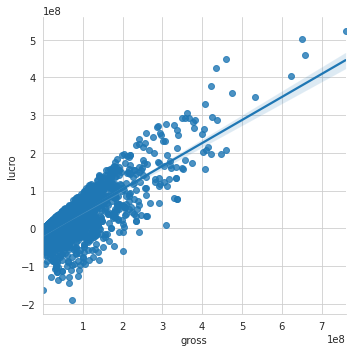

In [55]:
sns.lmplot(data=filmes_americanos, x="gross", y="lucro")

Ou pode-se usar a função `.pairplot()` para fazer isso, utilizando vários gráficos de dispersão. 

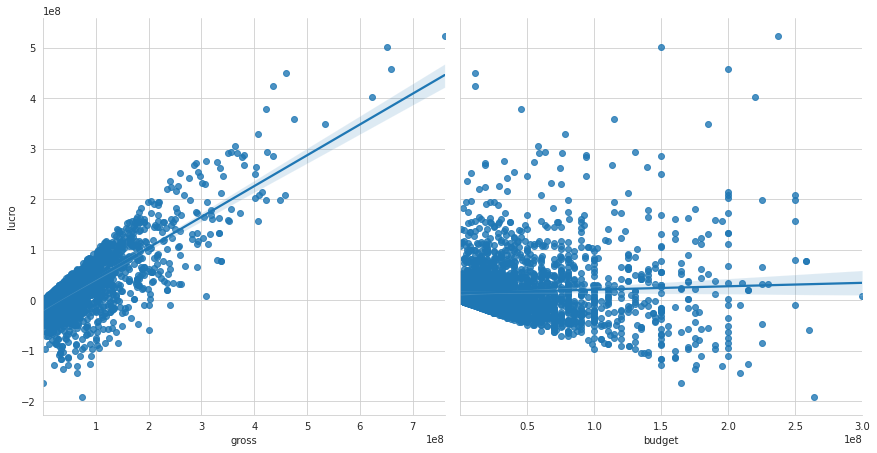

In [56]:
sns.pairplot(data=filmes_americanos, x_vars=["gross", "budget"], y_vars="lucro", kind='reg', height=6)


**DESAFIO 06. Analisar e interpretar a correlação de outras variáveis** \
Por exemplo, há alguma relação entre o IMDB Score do filme e o tanto que ele gastou na sua produção? Isto é, quem gasta mais tem melhores notas? 


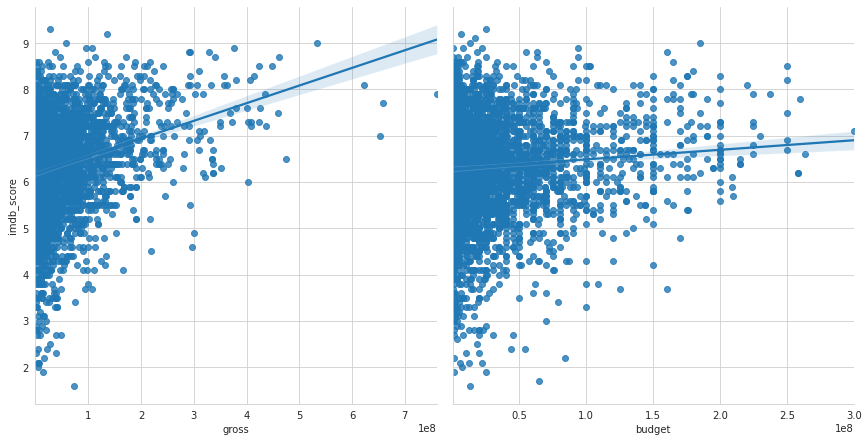

In [48]:
sns.pairplot(data=filmes_americanos, x_vars=["gross", "budget"], y_vars="imdb_score", kind='reg', height=6)


In [49]:
filmes_americanos[["gross", "budget", "imdb_score"]].corr()


,gross,budget,imdb_score
gross,1.000000,0.645673,0.258948
budget,0.645673,1.000000,0.078936
imdb_score,0.258948,0.078936,1.000000


Vemos que essa correlação é muito fraca e, portanto, não parece haver correspondência muito forte entre essas variáveis. 

Podemos nos perguntar agora se há relação entre o ano de lançamento dos filmes e o número de pessoas que votaram. Por exemplo, filmes mais recentes receberam mais votos dos usuários? Há alguma relação entre as variáveis? 

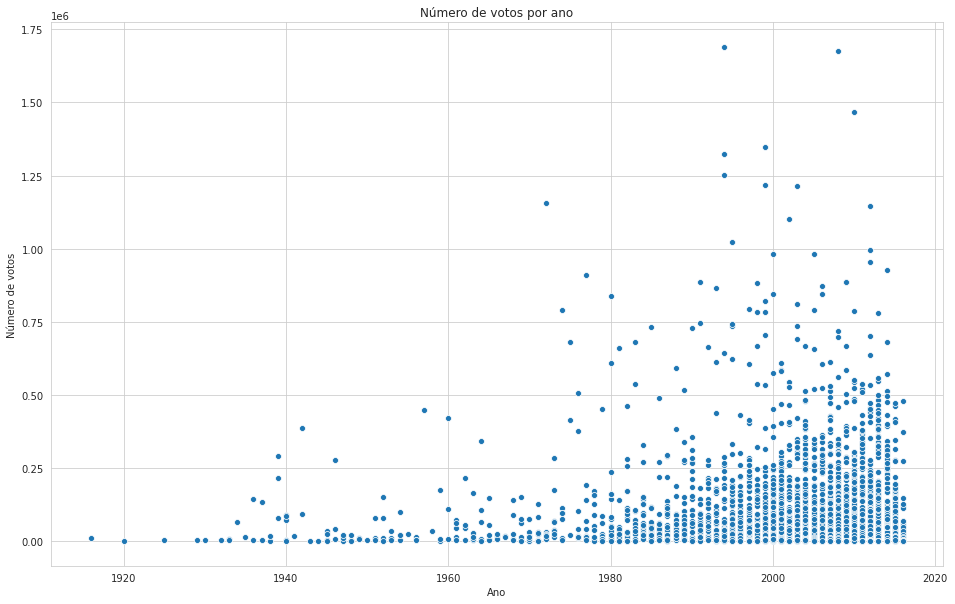

In [60]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=filmes_americanos, x='title_year', y='num_voted_users')
plt.title("Número de votos por ano")
plt.xlabel("Ano")
plt.ylabel("Número de votos")
plt.show()


In [51]:
filmes_americanos[["title_year", "num_voted_users"]].corr()

,title_year,num_voted_users
title_year,1.000000,0.025617
num_voted_users,0.025617,1.000000


Vemos que essa correlação é quase nula, ou seja, não há correlação entre o ano de lançamento e o número de votos dados pelos usuários. 

Outra coisa interessante a se fazer também seria agrupar os anos, para saber em cada ano quantos votos existiram...


In [62]:
# Criando uma Series com a média de votos de cada ano
anos = filmes_americanos.groupby("title_year")["num_voted_users"].mean() #Series, index(anos), values(as médias)
anos


title_year
1916.0     10718.000000
1920.0         5.000000
1925.0      4849.000000
1929.0      4546.000000
1930.0      3753.000000
              ...      
2012.0    116836.911765
2013.0    116100.719298
2014.0     87782.311475
2015.0     58938.095238
2016.0     39020.240000
Name: num_voted_users, Length: 90, dtype: float64

In [0]:
# Agora vamos adicionar essa Series no DataFrame original e depois renomear a coluna
filmes_americanos_votosano = filmes_americanos.join(anos, on="title_year", rsuffix='rs')
filmes_americanos_votosano.rename(columns={'num_voted_usersrs': 'votos_ano'}, inplace=True)

In [53]:
# E agora ver a correlação
filmes_americanos_votosano[["title_year", "votos_ano"]].corr()

,title_year,votos_ano
title_year,1.000000,0.142897
votos_ano,0.142897,1.000000


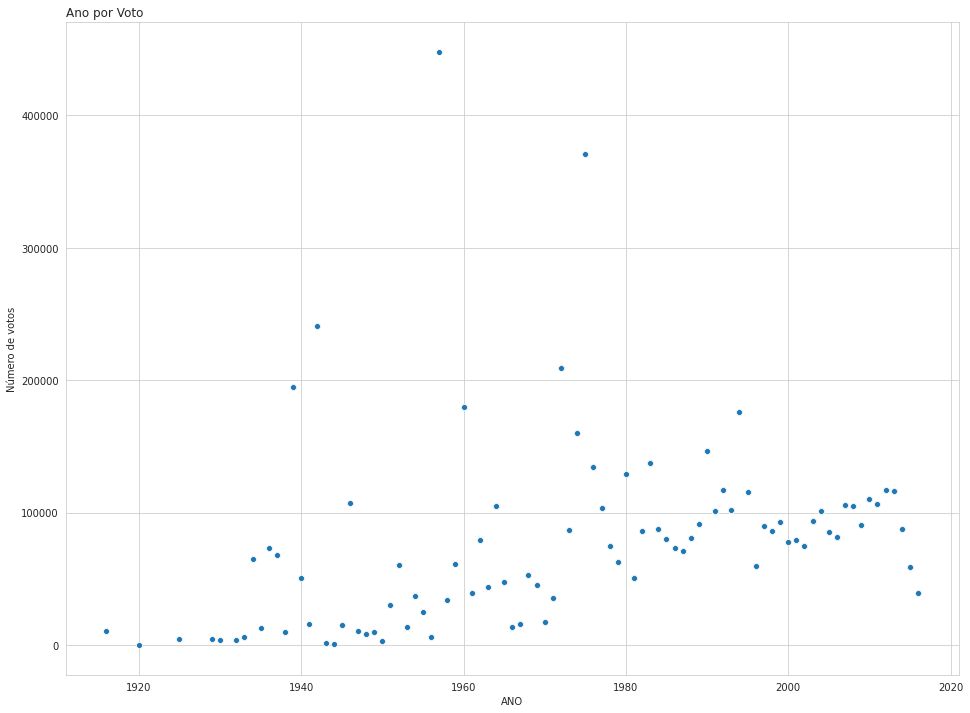

In [54]:
#Agora gerar o gráfico de dispersão... 
plt.figure(figsize=(16,12))
plt.title("Ano por Voto", loc='left')
sns.scatterplot(data=filmes_americanos_votosano, x="title_year", y="votos_ano")
plt.xlabel('ANO')
plt.ylabel('Número de votos')
plt.show()


Vemos que a relação é muito fraca. No gráfico de dispersão, dá pra ver que as bolinhas estão dispersar no gráfico, ou seja, não há nenhum correlação clara entre o ano de lançamento do filme e a média de votos recebidos. 